<a href="https://colab.research.google.com/github/Jack-Christopher/Life-Expectancy/blob/master/Practica_Calificada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de Datos

Se trabajará con el dataset propuesto de Kaggle: Life Expectancy (WHO)
Statistical Analysis on factors influencing Life Expectancy

In [31]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Jack-Christopher/Life-Expectancy/master/LifeExpectancy.csv", on_bad_lines='skip')  # dataframe


In [32]:
data.columns = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
data

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### 1. Explorar visualmente las variables predictoras, utilizando histogramas, matriz de correlación. (3pts)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Histogramas de variables predictoras

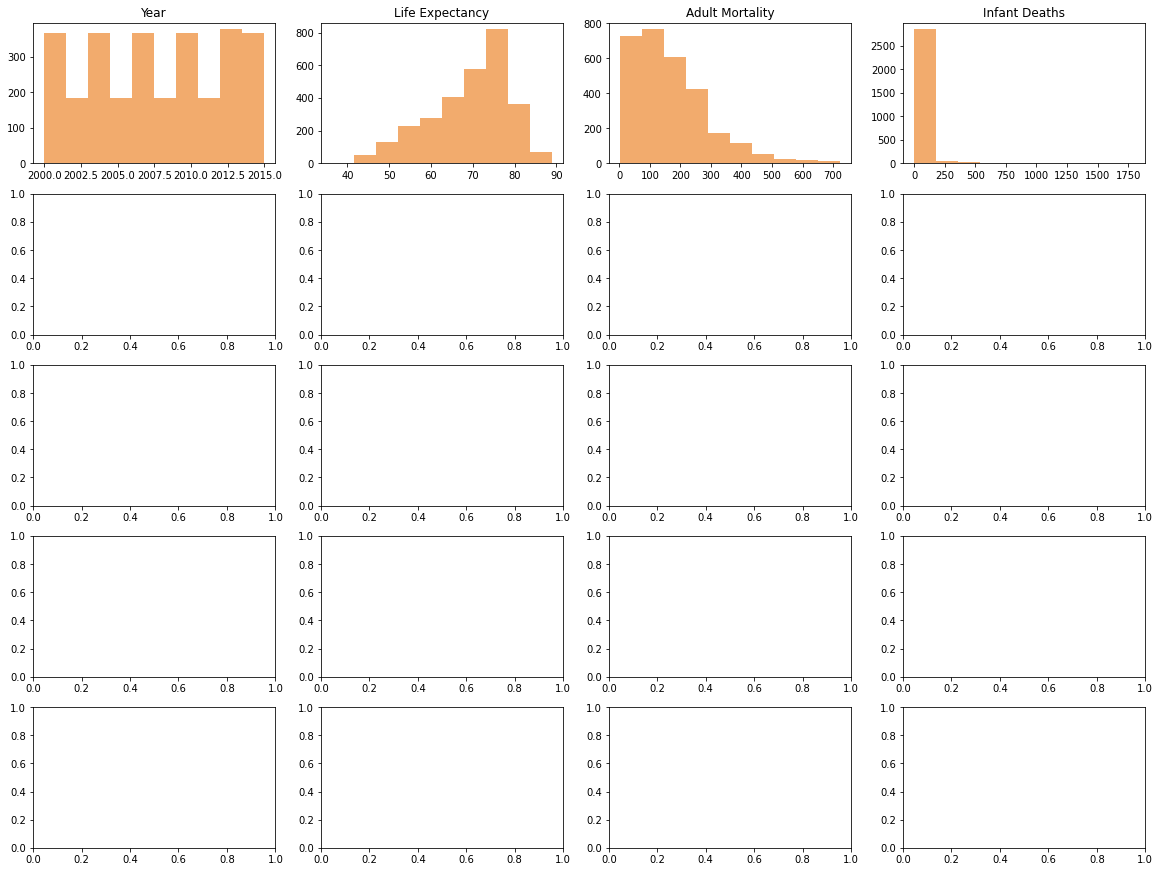

In [10]:
fig, axs = plt.subplots(5, 4, constrained_layout = True)
fig.set_size_inches(16, 12)

axs[0, 0].hist(x=data['Year'], color='#F2AB6D')
axs[0, 0].set_title('Year')
# 
axs[0, 1].hist(x=data['Life Expectancy'], color='#F2AB6D')
axs[0, 1].set_title('Life Expectancy')
# 
axs[0, 2].hist(x=data['Adult Mortality'], color='#F2AB6D')
axs[0, 2].set_title('Adult Mortality')
# 
axs[0, 3].hist(x=data['Infant Deaths'], color='#F2AB6D')
axs[0, 3].set_title('Infant Deaths')
# 
# COMPLETAR CON LOS DEMAS HISTOGRAMAS
# COMPLETAR CON LOS DEMAS HISTOGRAMAS
# COMPLETAR CON LOS DEMAS HISTOGRAMAS
# COMPLETAR CON LOS DEMAS HISTOGRAMAS
# COMPLETAR CON LOS DEMAS HISTOGRAMAS
# COMPLETAR CON LOS DEMAS HISTOGRAMAS

plt.show()


#### Matriz de Correlación

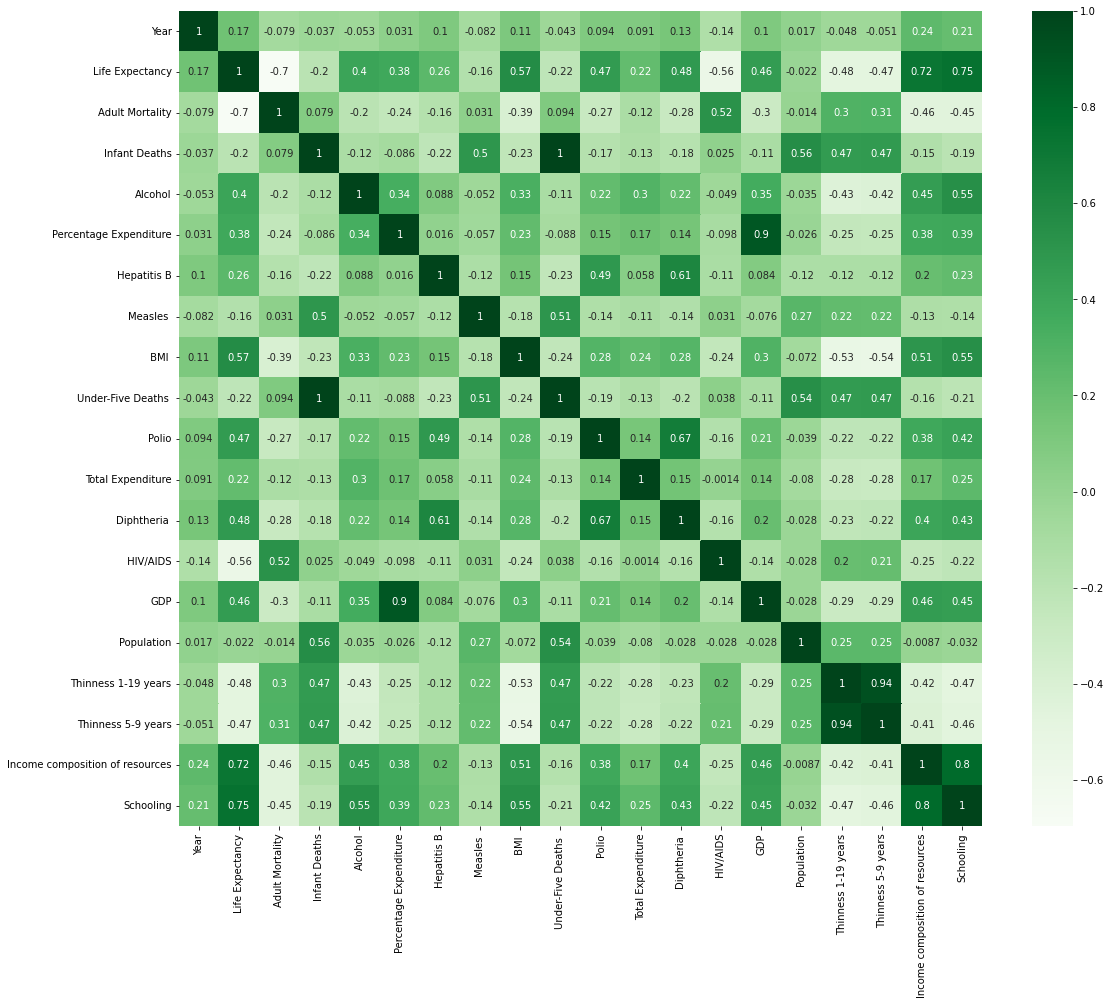

In [33]:
temp = data.iloc[: , [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].copy()
plt.figure(figsize=(18, 15))
corr = temp.corr()
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

### 2. Convertir las variables categóricas en numéricas a fin de poder realizar la regresión (4pts)

#### Convertir la variable categórica "Country" en numérica

Usando 'Label Encoding' a cada nombre de país se le considera como una categoría y por lo tanto se le asigna una variable numérica.

Se reemplaza la columna 'Country' con una columna con valores numéricos correspondiente a la categoria/país que corresponde

In [34]:
data['Country'] = data['Country'].astype('category')
data['Country'] = data['Country'].cat.codes
data

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### Convertir la variable categórica "Status" en numérica
Convertir a "Developed" con 1: developed y 0: developing

In [35]:
data['Status'] = data['Status'].map({'Developed': 1, 'Developing': 0})
data.rename(columns = {'Status':'Developed'}, inplace = True)
data

,Country,Year,Developed,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### 3. Utilizar StandardScaler para normalizar los valores de las referidas columnas



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(data)
# scaled
data = pd.DataFrame(scaled,columns = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling'])
# temp = pd.DataFrame(scaled,columns = ['Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
#        'Measles ', ' BMI ', 'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#        'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling'])
data

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,-1.691042,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,-1.691042,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,-1.691042,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,-1.691042,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.723181,-0.762774,-0.459399,-2.617549,4.491830,-0.028022,-0.059941,-0.371433,-0.516281,-0.208332,...,-0.663856,0.477133,-0.730578,6.275044,-0.492650,0.000396,1.031873,1.004786,-1.045932,-0.831606
2934,1.723181,-0.979550,-0.459399,-2.596545,4.427455,-0.036503,-0.133984,-0.371433,-2.949977,-0.123991,...,-3.225328,0.232924,-0.604064,6.885650,-0.492722,-0.001959,1.122383,1.115698,-0.993766,-0.742275
2935,1.723181,-1.196326,-0.459399,-2.565040,-0.738680,-0.044984,-0.042664,-0.371433,-0.316798,-0.184521,...,-0.407709,0.236927,-0.477551,7.496256,-0.520477,-0.207018,-0.823568,-0.791977,-0.951085,-0.593391
2936,1.723181,-1.413102,-0.459399,-2.512532,4.194093,-0.044984,-0.711523,-0.371433,-0.197108,-0.164897,...,-0.279635,0.088800,-0.308866,7.949287,-0.486046,-0.006348,-0.733059,-0.703248,-0.951085,-0.652944


3. Utilizar los métodos de Mínimos Cuadrados (Linear Regression), RANSAC, Ridge y Lasso para predecir Temperature a partir de Humidity. Dividir el conjunto de datos en entrenamiento y test, siendo el conjunto de test el 30% de todo el conjunto de datos

In [37]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# plt.scatter(H_T['Humidity'],H_T['Temperature (C)'])


In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso

y = data['Life Expectancy']
X = data.drop('Life Expectancy',axis=1 )

# X = data[['Country', 'Year', 'Status', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
#        'Measles ', ' BMI ', 'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#        'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# X = temp[['Year', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
#        'Measles ', ' BMI ', 'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#        'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']].to_numpy().reshape(-1, 1)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=500, max_trials=100, loss='absolute_loss', 
                         random_state=42, residual_threshold=None)
# Fit the model
ransac.fit(X_train, y_train)


linear_model = LinearRegression(fit_intercept=True)
# Fit the model
linear_model.fit(X_train, y_train)


ridge_model = Ridge(alpha=0.05)
# Fit the model
ridge_model.fit(X_train, y_train)


lasso_model = Lasso(alpha=0.05)
# Fit the model
lasso_model.fit(X_train, y_train)

#line_X = np.arange(0, 1.0, 0.01)

#line_y_ransac = ransac.predict(line_X[:, np.newaxis])
#line_y_linear = linear_model.predict(line_X[:, np.newaxis])
#line_y_ridge = ridge_model.predict(line_X[:, np.newaxis])
#line_y_lasso = lasso_model.predict(line_X[:, np.newaxis])

line_y_ransac = ransac.predict(X_test)
line_y_linear = linear_model.predict(X_test)
line_y_ridge = ridge_model.predict(X_test)
line_y_lasso = lasso_model.predict(X_test)




(2938, 21)
(2938,)


ValueError: ignored

4. Crear un DataFrame para comparar los referidos métodos utilizando las métricas MAE, MSE y RMSE

## Functions

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    #print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso

ransac_test_pred = ransac.predict(X_test)
linear_test_pred = linear_model.predict(X_test)
ridge_test_pred = ridge_model.predict(X_test)
lasso_test_pred = lasso_model.predict(X_test)

ransac_train_pred = ransac.predict(X_train)
linear_train_pred = linear_model.predict(X_train)
ridge_train_pred = ridge_model.predict(X_train)
lasso_train_pred = lasso_model.predict(X_train)

print('===================== Linear =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, linear_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, linear_train_pred)
print()

print('===================== RANSAC =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, ransac_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, ransac_train_pred)
print()

print('===================== RIDGE =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, ridge_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, ridge_train_pred)
print()

print('===================== LASSO =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, lasso_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, lasso_train_pred)


===================== Linear =====================
Test set evaluation:
_____________________________________
MAE: 0.6316604285871849
MSE: 0.6001022111746226
RMSE: 0.7746626434614119
__________________________________
------------------------------------
Train set evaluation:
_____________________________________
MAE: 0.6317386412687612
MSE: 0.600321314868009
RMSE: 0.7748040493363525
__________________________________

===================== RANSAC =====================
Test set evaluation:
_____________________________________
MAE: 0.6318825733673267
MSE: 0.6208557886887163
RMSE: 0.7879440263678101
__________________________________
------------------------------------
Train set evaluation:
_____________________________________
MAE: 0.6305987732853221
MSE: 0.6205899231259999
RMSE: 0.7877752998958523
__________________________________

===================== RIDGE =====================
Test set evaluation:
_____________________________________
MAE: 0.6316604545621912
MSE: 0.6001022074378

In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, linear_test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
#results_df


results_df_2 = pd.DataFrame(data=[["RANSAC Regression", *evaluate(y_test, ransac_test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, ridge_test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)
#results_df

results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, lasso_test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.631660,0.600102,0.774663,0.396148,0.391105
1,RANSAC Regression,0.631883,0.620856,0.787944,0.375265,0.327998
2,Ridge Regression,0.631660,0.600102,0.774663,0.396148,0.391105
3,Lasso Regression,0.635893,0.602175,0.775999,0.394062,-0.004564


5. Hacer un gráfico comparando las predicciones de todos los métodos, utilizando un color diferente para cada método. Los gráficos deberán mostrarse encima de un scatter plot de los valores originales.

No handles with labels found to put in legend.


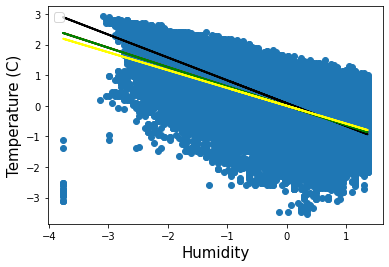

In [ ]:
plot.scatter(H_T['Humidity'],H_T['Temperature (C)'])

plot.plot(X_test, line_y_linear, color='red', lw=2)
plot.plot(X_test, line_y_ransac, color='black', lw=2)
plot.plot(X_test, line_y_ridge, color='green', lw=2)
plot.plot(X_test, line_y_lasso, color='yellow', lw=2)

plot.xlabel('Humidity', fontsize=15)
plot.ylabel('Temperature (C)', fontsize=15)
plot.legend(loc='upper left', fontsize=12)

plot.show()